In [32]:
import pandas as pd

In [33]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [34]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
df.shape

(5572, 2)

In [36]:
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ã¼ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [37]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [38]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [39]:
df.nunique()
# These are all the unique values present in the dataframe

Category       2
Message     5157
dtype: int64

In [40]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [42]:
df["Category"].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

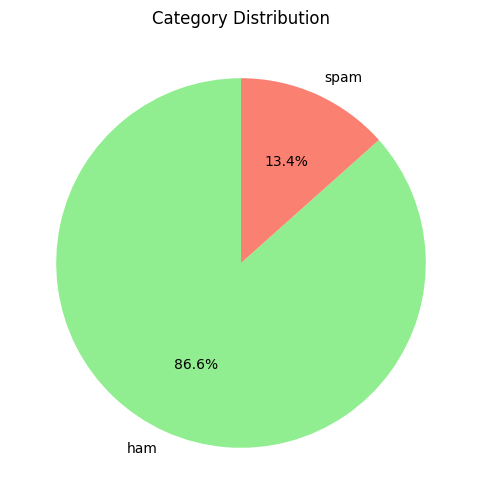

In [43]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Data for the pie chart
categories = category_counts.index  # ['ham', 'spam']
values = category_counts.values     # [4825, 747]

# Creating the pie chart
plt.figure(figsize=(6, 6))  # Optional: Adjust the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])

# Adding title
plt.title('Category Distribution')

# Display the pie chart
plt.show()


In [45]:
df['class'] = df['Category'].map({"ham": 0, "spam": 1})

In [46]:
df.head()

,Category,Message,class
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
x = df["Message"]
y = df["class"]
# x.shape
# y.shape

(5572,)

In [52]:
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
model = MultinomialNB()
model.fit(x_train, y_train)
model.score(x_test,y_test)


0.9856502242152466

In [57]:
msg = "you won $3000"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [59]:
my_prediction

array([1])

In [61]:
import pickle
pickle.dump(model, open('spam.pkl',"wb"))
model1 = pickle.load(open('spam.pkl', 'rb'))


In [62]:
pickle.dump(cv, open('vec.pkl','wb'))